In [1]:
import numpy as np

import matplotlib.pyplot as plt

from WDM.code.discrete_wavelet_transform.WDM import WDM_transform


# Wavelet transform

In [3]:
wdm = WDM_transform(dt=1., Nf=16, N=512, q=5)

x = np.random.randn(wdm.N) # white noise

w = wdm.forward_transform_exact(x)

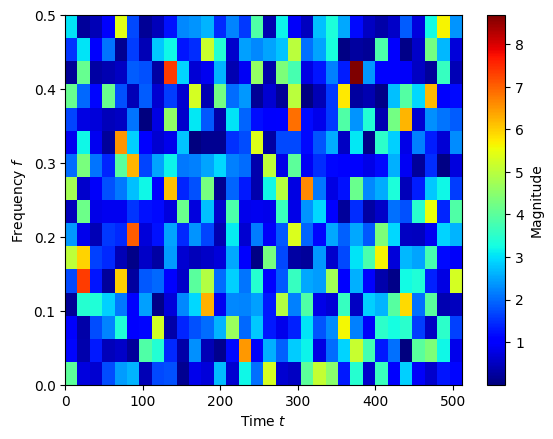

In [4]:
wdm.time_frequency_plot(w)

In [6]:
x_ = wdm.inverse_transform_exact(w)

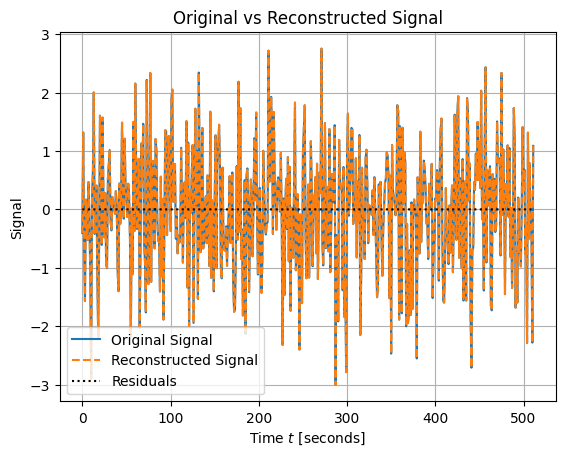

In [7]:
plt.plot(wdm.times, x, label='Original Signal')
plt.plot(wdm.times, x_, label='Reconstructed Signal', linestyle='--')
plt.plot(wdm.times, x-x_, label='Residuals', linestyle=':', c='k')

plt.xlabel('Time $t$ [seconds]')
plt.ylabel('Signal')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.grid()
plt.show()